# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday, April 5th at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 2)_


Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

## Part 1: TF-IDF

For this exercise, you need the following data: 
* The r/wallstreetbets submissions (either the one provided by me [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz) or the one you downloaded in Week 6).
* The list of 15 stocks you identified in Week 6, Exercise 2.

_Exercise_


> 1. Tokenize the __text__ of each submission. Create a column __tokens__ in your dataframe containing the tokens. Remember to follow the instructions in Week 6, Exercise 3.

In [1]:
# Getting the data
import pandas as pd
df = pd.read_csv('..\data\wallstreet_subs.csv')
    
df['text'] = df['title']+ ' ' + df['selftext']
    
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
alphabet = "abcdefghijklmnopqrstuvwxyz"
URL1 = '.com'
URL2 = 'www.'
URL3 = 'https'
URL4 = '='
char1 = 'amp' # a part of "&amp" which means ampersand in HTML
char2 = 'x200b' # character code for zero width space

all_subs = []
for text in df['text']:
    tokens = word_tokenize(text)
    sub = []
    for token in tokens:
        token = token.lower()
        # remove stopwords, punctuation and numbers
        if token not in stopwords and token[0] in alphabet and token[-1] in alphabet:
            # remove URLs
            if token[-4:] == URL1 or token[:4] == URL2 or token[:5] == URL3 or URL4 in token or token in char1 or token in char2:
                pass
            else:
                sub.append(token)
    all_subs.append(sub)

df['token'] = all_subs

> 2. Find submissions discussing at least one of the top 15 stocks you identified above (follow the instructions in Week 6, Exercise 3).

In [8]:
import re
import numpy as np

# find ze tickers
tickers = []
for text in df['text']:
    ticker = re.findall('\$[a-zA-Z]+', text)
    if ticker != []:
        tickers.extend(ticker)
        

cleaned_tickers = [t.upper()[1:] for t in tickers]
tick,count = np.unique(cleaned_tickers,return_counts=True)
dic = {t:c for (t,c) in zip(tick,count)}

The 16 most mentioned stocks have been printed, as $ROPE is a "joke" stock when people have lost a lot of money:

(source: https://www.urbandictionary.com/define.php?term=%24ROPE)

In [12]:
# sort the stocks
print(sorted(dic, key=dic.get, reverse=True)[:16])
print(sorted(dic.values(), reverse=True)[:16])

['SPY', 'TSLA', 'SPCE', 'PLTR', 'MSFT', 'ROPE', 'AAPL', 'AMZN', 'NIO', 'ZM', 'AMD', 'BABA', 'GME', 'DIS', 'BA', 'WORK']
[1150, 988, 562, 394, 377, 359, 243, 230, 228, 227, 212, 207, 202, 169, 164, 149]


Short description of each of the stocks:

__Number 1__: S&P500: famous index fund, many people are saying this

__Number 2__: TSLA: Elon Musk!!!

__Number 3__: SPCE: Virgin galactic. Notable because of the billionaire space race, which peaked in 2020-2021

__Number 4__: PLTR: Palantir, data company, went public in late 2020 so that might be why it is so mentioned.

__Number 5__: MSFT: microsoft, not much to say, top 10 company.

__Number 6__: Apple: top 5 company

__Number 7__: AMZN: Amazon top 5 company

__Number 8__: NIO: NIO, Chinese Electric vehichle producer

__Number 9__: ZM: Zoom, grew immensely during the corona pandemic, which happened in 2020.

__Number 10__: AMD: Computer parts producer, mainly known for their processors.

__Number 11__: BABA: Alibaba, chinese shipping? company, massive international cooperation.

__NUmber 12__: GME: gamestop, as we know, had the whole thing happen

__Number 13__: DIS: Disney, entertainment giant.

__Number 14__: Boeing: big airplane company

__Number 15__: WORK: slack technologies, the communications platform which is used by many workplaces. Also saw growth during lockdowns in 2020? which may be why it grew

In [16]:
def token_intersection(token_list):
    top15_stocks = set(sorted(dic, key=dic.get, reverse=True)[:16])
    token_list = set([token.upper() for token in token_list])

    intersection = top15_stocks.intersection(token_list)
    if len(intersection) == 0:
        return ['Other']
    else:
        return list(intersection)

stocks = []
for token_list in df['token']:
    intersections = token_intersection(token_list)
    stocks.append(intersections)
    
df['stock'] = stocks
df2 = df.explode('stock')

In [32]:
np.where(df2['stock']=='TSLA')[0][:10]

array([ 43, 124, 133, 249, 283, 365, 456, 504, 520, 525], dtype=int64)

In [39]:
# some TESLA submissions
df2.iloc[np.where(df2['stock']=='TSLA')[0][:10]]['text']

42     Any Canadian here trading US options on stock ...
114    Call your friends &amp; family Like many other...
118    Here are all positions commented in the last 2...
224    Here are all positions posted in the last 24 h...
252    The Last Bear As the lone bear stood there.. w...
326    Here are all positions posted in the last 24 h...
411    Question: Will the TSLA stock drop in price ag...
455    Week of opportunities Msft 9/18 $170c. Tsla 5/...
469    JPow - An Inevitable Ending “WOOHHH YOU’RE THE...
472    CALL OPTION LOTTERY WINNER I have recently had...
Name: text, dtype: object

> 3. Now, we want to find out which words are important for each *stock*, so we're going to create several ***large documents, one for each stock***. Each document includes all the tokens related to the same stock. We will also have a document including discussions that do not relate to the top 15 stocks.

In [ ]:
# create document for each stock

dic = {}
for i in range(len(df2)):
    stock = df2['stock'].iloc[i]
    dic[stock] = list(dic.get(stock, '')) + df2['token'].iloc[i]
    
    if i % 10000 == 0:
        print(i)

0
10000


In [42]:
len(df2)

89159

> 4. Now, we're ready to calculate the TF for each word. Find the top 5 terms within __5 stocks of your choice__. 

We choose the 5 stocks: \\$GME, \\$TSLA, \\$AMZN, \\$AAPL, \\$SPY

In [ ]:
import numpy as np
from collections import Counter

# compute term frequencies

five_stocks = ['GME', 'TSLA', 'AMZN', 'AAPL', 'SPY']

# for key in dic.keys():
for key in five_stocks:
    print("stock:", key)
    a = dict(Counter(dic[key],sorted=True))
    print(sorted(a, key=a.get, reverse=True)[:5])
    counts = sorted(a.values(), reverse=True)[:5]
    tf = [count/len(dic[key]) for count in counts]
    print(np.round(tf,3))
    print("\n")

>   * Describe similarities and differences between the stocks.




>   * Why are the TFs not necessarily a good description of the stocks?

The term frequency just describes the most common terms in a document, not necesarrily the terms that are most descriptive for that document. For example, in many of the stock we have terms like "n't" and "like" that are not descriptive of what the stock is about.

>   * Next, we calculate IDF for every word. 

Formula:
$$\operatorname{idf}(t, D)=\log \frac{N}{|\{d \in D: t \in d\}|}$$


(source: https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

>   * What base logarithm did you use? Is that important?

The natural logarithm was used. The base is not important, however, as the logarithm will scale the same percentage as a function of $N$, the number of documents, no matter what base. The important thing is there for that they all reach 0 when $|\{d \in D: t \in d\}|=N$.

> 5. We're ready to calculate TF-IDF. Do that for the __5 stock of your choice__. 
>   * List the 10 top TF words for each stock.
>  * List the 10 top TF-IDF words for each stock.
>   * Are these 10 words more descriptive of the stock? If yes, what is it about IDF that makes the words more informative?

> 6. Visualize the results in a Wordcloud and comment your results (follow the instrutions in Week 6, Exercise 4). 

## Part 2: Sentiment analysis

_Exercise: Creating Word Shifts_
>    1. Pick a day of your choice in 2020. We call it $d$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).
>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for submissions posted on r/wallstreebets on day $d$, and in the 7 days preceding day $d$, respectively. 
>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.
>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?
>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 
>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).
>    7. Now install the [``shifterator``](https://shifterator.readthedocs.io/en/latest/installation.html) Python package. We will use it for plotting Word Shifts. 
>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 
>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 

>    1. Pick a day of your choice in 2020. We call it $d$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).
>
> We pick the date 20/02/2020 where stock markets across the world suddenly crashed due to the COVID-19 pandemic.

>    2. Build two lists $l$ and $l_{ref}$ containing all tokens for submissions posted on r/wallstreebets on day $d$, and in the 7 days preceding day $d$, respectively. 

In [2]:
df['date'] = [date.strftime('%Y-%m-%d') for date in pd.to_datetime(df['created_utc'], unit='s')]
df = df.set_index('date')

In [3]:
l = [token for token in df.loc["2020-12-25"]['token'] for token in token]
len(l)

11033

In [4]:
l_ref = []
for i in range(18,25):
    l_ref.extend(token for token in df.loc["2020-12-{}".format(i)]['token'])
l_ref = [token for token in l_ref for token in token]
len(l_ref)

106770

>    3. For each token $i$, compute the relative frequency in the two lists $l$ and $l_{ref}$. We call them $p(i,l)$ and $p(i,l_{ref})$, respectively. The relative frequency is computed as the number of times a token occurs over the total length of the document. Store the result in a dictionary.

In [5]:
from collections import Counter
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l_ref)) for item in Counter(l_ref).items()])

>    4. For each token $i$, compute the difference in relative frequency $\delta p(i) = p(i,l) - p(i,l_{ref})$. Store the values in a dictionary. Print the top 10 tokens (those with largest relative frequency). Do you notice anything interesting?

In [6]:
all_tokens = set(p.keys()).union(set(p_ref.keys()))
delta_p = dict([(token, p.get(token,0) - p_ref.get(token,0)) for token in all_tokens])
# printing the top 10 tokens with largest relative frequency
print(sorted(delta_p.items(), key=lambda x:x[1], reverse=True)[:10])

[('christmas', 0.0033387648577762417), ('gme', 0.0028411466240715216), ('cerner', 0.0022659294842744494), ('like', 0.0021371783395630374), ('merry', 0.0019598759894590583), ('make', 0.00190637738796858), ('money', 0.0018447369752263723), ('robinhood', 0.0013320592345249197), ('trading', 0.001290349323770835), ('options', 0.0012776616466810289)]


As expected, the Reddit users are wishing each other Merry Christmas on Christmas day. Also, it is worth noting that people are  already actively discussing the GME stock before its large surge in price in January 2021. One of the other stocks that was discussed is Cerner, a health informatics company, who on the 16th of December acquired another lifescience company called Kantar Health for $375 million dollars.

>    5. Now, for each token, compute the happiness $h(i) = labMT(i) - 5$, using the labMT dictionary. Here, we subtract $5$, so that positive tokens will have a positive value and negative tokens will have a negative value. Then, compute the product $\delta \Phi = h(i)\cdot \delta p(i)$. Store the results in a dictionary. 

In [7]:
# load labMT dataframe 
labMT = pd.read_csv('..\data\Hedonometer.csv')
labMT

,Rank,Word,Word in English,Happiness Score,Standard Deviation of Ratings
0,0,laughter,laughter,8.50,0.93
1,1,happiness,happiness,8.44,0.97
2,2,love,love,8.42,1.11
3,3,happy,happy,8.30,0.99
4,4,laughed,laughed,8.26,1.16
...,...,...,...,...,...
10182,10182,quarantined,quarantined,2.14,1.01
10183,10183,sanitizer,sanitizer,5.14,1.55
10184,10184,self-quarantine,self-quarantine,3.14,1.80
10185,10185,ventilator,ventilator,2.98,1.70


In [8]:
# make as dic
labMTdic = labMT.set_index("Word")
labMTdic

,Rank,Word in English,Happiness Score,Standard Deviation of Ratings
Word,,,,
laughter,0,laughter,8.50,0.93
happiness,1,happiness,8.44,0.97
love,2,love,8.42,1.11
happy,3,happy,8.30,0.99
laughed,4,laughed,8.26,1.16
...,...,...,...,...
quarantined,10182,quarantined,2.14,1.01
sanitizer,10183,sanitizer,5.14,1.55
self-quarantine,10184,self-quarantine,3.14,1.80


In [10]:
# compute happiness
import numpy as np
h = dict([(token, labMTdic['Happiness Score'].get(token, np.nan)-5) for token in all_tokens])

In [11]:
# compute delta phi
d_phi = dict([(token, h[token]*delta_p[token]) for token in all_tokens if not np.isnan(h[token])])

>    6. Print the top 10 tokens, ordered by the absolute value of $|\delta \Phi|$. Explain in your own words the meaning of $\delta \Phi$. If that is unclear, have a look at [this page](https://shifterator.readthedocs.io/en/latest/cookbook/weighted_avg_shifts.html).

In [12]:
# print top 10 tokens ordered by |d_phi|
sorted(d_phi.items(), key=lambda x:abs(x[1]), reverse=True)[:10]

[('christmas', 0.009882743979017675),
 ('merry', 0.005017282533015189),
 ('like', 0.0047445359138299425),
 ('money', 0.0042428950430206565),
 ('million', -0.0028884855815959104),
 ('market', -0.0025156758729236012),
 ('us', -0.001941480470591087),
 ('make', 0.00190637738796858),
 ('thanks', 0.0018765415674099574),
 ('gains', 0.0018502844595709585)]

In [13]:
print(h['christmas'])
print(delta_p['christmas'])

2.96
0.0033387648577762417


$\delta \Phi$ is a measure for how the relative frequency contributes to the overall sentiment. E.g., the word christmas has a positive sentiment, as the happiness is 2.96. Since this word is used more on Christmas Day (as indicated by the positive relative frequency $\delta p$), it contributes positively to the overall sentiment. 

>    8. Use the function ``shifterator.WeightedAvgShift`` to plot the WordShift, showing which words contributed the most to make your day of choice _d_ happier or more sad then days in the preceding 7 days. Comment on the figure. 

C:\Users\Yucheng\anaconda3\lib\site-packages\shifterator\plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


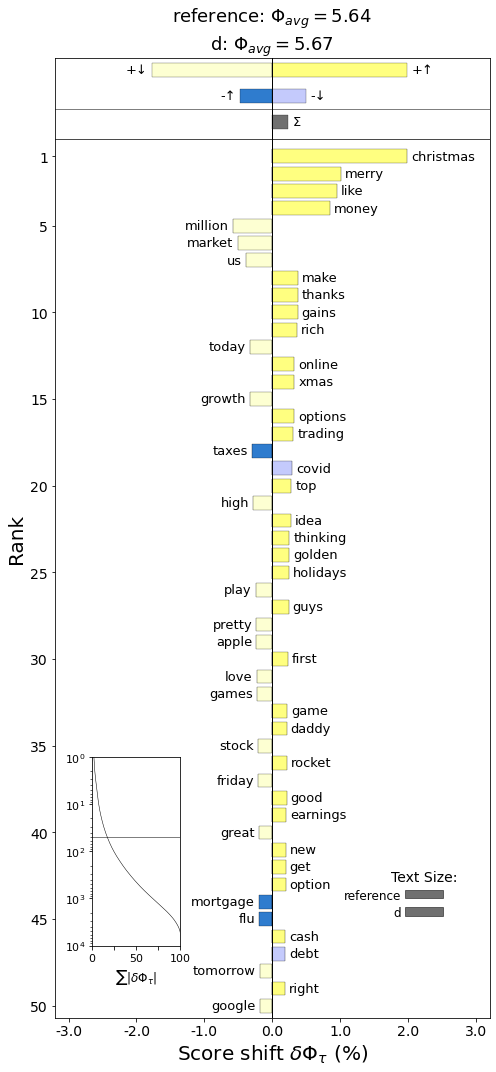

<AxesSubplot:title={'center':'reference: $\\Phi_{avg}=$5.64\nd: $\\Phi_{avg}=$5.67'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [22]:
import shifterator as sh
sentiment_shift = sh.WeightedAvgShift(type2freq_1 = p_ref,
                                      type2freq_2 = p,
                                      type2score_1 = dict(labMTdic['Happiness Score']),
                                      reference_value=5)
sentiment_shift.get_shift_graph(detailed=True,
                             system_names = ['reference', 'd'])

The figure shows the $\delta \Phi$ of different words. Some words are associated with positive happiness (the words of the yellow bars), while the words with negative happines have blue bars. If the word is on the rigt side of the plot, it contributes positively to the sentiment change. 

Most of these words have positive happiness and are used more, such as "Christmas" and "money", however there are two words "covid" and "debt" which have negative happiness and are also used less, resulting in a positive change in sentiment.

>    9. How do words that you printed in step 6 relate to those shown by the WordShift? 
>
> The top words that we printed in step 6 are also the uppermost 10 bars in the plot, because they contribute most to the absolute change in sentiment. 

## Part 3: Communities for the Zachary Karate Club Network

_Exercise: Zachary's karate club_: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html).

> 1. Visualize the graph using [netwulf](https://netwulf.readthedocs.io/en/latest/). Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.
>
> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.
> 3. Explain in your own words the concept of _modularity_. 
> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.
> 5. We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from $0$. To do so, we will implement a [configuration model](https://en.wikipedia.org/wiki/Configuration_model). In short, we will create a new network, such that each node has the same degree as in the original network, but different connections. Here is how the algorithm works.
>       * __a.__ Create an identical copy of your original network. 
>       * __b.__ Consider the list of network edges. Create two lists: the list of source nodes and target nodes. (e.g. edges = [(1,2),(3,4)], sources = [1,3], targets = [2,4])
>       * __c.__ Concatenate the list of source nodes and target nodes into a unique list (e.g. [1,3,2,4]). This is the list of _stubs_ (see the [Wikipedia page](https://en.wikipedia.org/wiki/Configuration_model) for the definition of stub).
>       * __d.__ Shuffle the list of stubs. Build a set of edges (tuples), by connecting each element in the list of shuffled stubs with the following element. (e.g. [4,1,2,3] --> [(4,1),(2,3)])
>       * __e.__ Remove all the original network edges from your network. Add all the new _shuffled_ edges you created in step __d.__
> 6. Is the degree of the nodes in your original and the configuration model network the same? Why? __Note 1:__ With this algorithm you may obtain some self-loops. Note that [a self-loop should add two to the degree](https://en.wikipedia.org/wiki/Loop_(graph_theory%29#:~:text=For%20an%20undirected%20graph%2C%20the,adds%20two%20to%20the%20degree.&text=In%20other%20words%2C%20a%20vertex,not%20one%2C%20to%20the%20degree.). __Note 2:__ With this algorithm, you could also obtain repeated edges between the same two nodes. Only NetworkX [MultiGraph](https://networkx.org/documentation/stable/reference/classes/multigraph.html) allow for repeated edges, while regular [Graph](https://networkx.org/documentation/stable/reference/classes/graph.html?highlight=graph%20undirected#networkx.Graph) do not, meaning you will not be able to account for multi-edges when you have a regular Graph. (_Optional_: if you want to implement a configuration model without self-loops and multi-edges, you can try out the [double_edge_swap](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.swap.double_edge_swap.html) algorithm)
> 7. Create $1000$ randomized version of the Karate Club network using the algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.
> 8. Compute the average and standard deviation of the modularity for the configuration model.
> 9. Plot the distribution of the configuration model modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)). 
> 10. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to compare with the configuration model? What is the reason why we preserved the nodes degree?
> 11.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?
> 12.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

_Exercise: Community detection on the GME network._
> * Consider the GME network you built in [Week 4](https://github.com/lalessan/comsocsci2022/blob/main/lectures/Week4.ipynb), part 2.
> * Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0? 
> * Visualize the network, using netwulf (see Week 4). This time assign each node a different color based on their _community_. Describe the structure you observe.